# Native Python Simple Perceptron Implementation

## Author: Mugdhesh Pandkar

Inspired by https://www.youtube.com/watch?v=GVsUOuSjvcg and https://en.wikipedia.org/wiki/Perceptron.

## Define constants

In [703]:
HEIGHT, WIDTH = 20, 20
weights = [[0] * WIDTH for x in range(HEIGHT)]
input = [[0] * WIDTH for x in range(HEIGHT)]
BIAS = 5
ITERATIONS = 150
EPOCHS = 35

## Handle imports

In [704]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import random

## Visualizing the layer

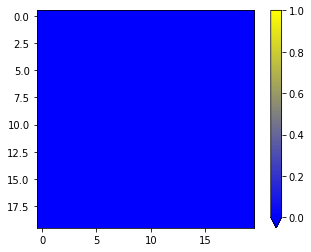

In [705]:
def visualize(layer):
    nodes = [0, 1.0]
    colors = ["blue", "yellow"]
    cmap = LinearSegmentedColormap.from_list("", list(zip(nodes, colors)))
    fig, ax = plt.subplots()
    im = ax.imshow(layer, cmap=cmap, vmin=0, vmax=1)
    fig.colorbar(im, extend="min")
    plt.show()


visualize(input)

## Generating Training Data

### Rectangles

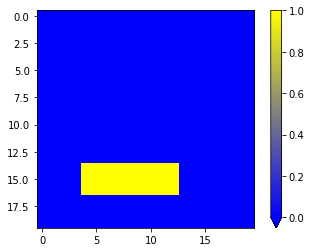

In [706]:
def generate_rect(layer):
    layer = [[0] * WIDTH for x in range(HEIGHT)]
    x = random.randint(0, WIDTH - 3)
    y = random.randint(0, HEIGHT -  3)

    width = random.randint(2, WIDTH - x)
    height = random.randint(2, HEIGHT - y)
    
    for i in range(y, y + height):
        for j in range(x, x + width):
            layer[i][j] = 1
    
    return layer

random.seed(100)
input = generate_rect(input)
visualize(input)

### Circles

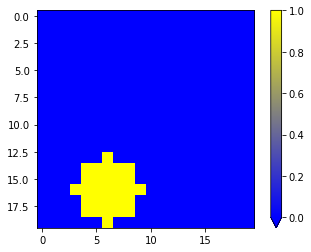

In [707]:
def generate_circle(layer):
    layer = [[0] * WIDTH for x in range(HEIGHT)]

    x = random.randint(2, WIDTH - 2)
    y = random.randint(2, HEIGHT - 2)

    minRadius = min(min(HEIGHT - 1 - y, y - 1), min(WIDTH - 1 - x, x - 1))


    r = 2 if minRadius < 2 else random.randint(2, minRadius)
    for i in range(HEIGHT):
        for j in range(WIDTH):
            if pow(j - x, 2) + pow(i - y, 2) <= r**2:
                layer[i][j] = 1
    
    return layer

random.seed(100)
input = generate_circle(input)
visualize(input)

# Training

In [708]:
def activation(weights, layer):
    sum = 0
    for i in range(HEIGHT):
        for j in range(WIDTH):
            sum += weights[i][j] * layer[i][j]

    return sum

def add_weight(weights, layer):
    for x in range(HEIGHT):
        for y in range(WIDTH):
            weights[x][y] += layer[x][y]

    return weights

def subtract_weight(weights, layer):
    for x in range(HEIGHT):
        for y in range(WIDTH):
            weights[x][y] -= layer[x][y]

    return weights

In [716]:
def train(input, weights):
    for x in range(EPOCHS):
        correct = 0
        adjusted = 0
        random.seed(100)
        for y in range(ITERATIONS):
            input = generate_rect(input)
            if(activation(weights, input) > BIAS):
                weights = subtract_weight(weights, input)
                adjusted += 1
            else:
                correct += 1

            input = generate_circle(input)
            if(activation(weights, input) < BIAS):
                weights = add_weight(weights, input)
                adjusted += 1   
            else:
                correct += 1
        accuracy = (correct / (ITERATIONS * 2)) * 100
        print(f"Epoch {x}, Iteration {y}: {accuracy}% Accuracy")
    
    print("Training Complete!")
    return weights

In [717]:
def test(input, weights):
    correct = 0
    random.seed(200)
    for x in range(ITERATIONS):
        input = generate_rect(input)
        if(activation(weights, input) > BIAS):
            weights = subtract_weight(weights, input)
        else:
            correct += 1

        input = generate_circle(input)
        if(activation(weights, input) < BIAS):
            weights = add_weight(weights, input)   
        else:
            correct += 1
    accuracy = (correct / (ITERATIONS * 2)) * 100
    print(f"Testing Complete! Final Accuracy: {accuracy}%")

In [718]:
weights = [[0] * WIDTH for x in range(HEIGHT)]
weights = train(input, weights)
test(input, weights)

Epoch 0, Iteration 149: 47.66666666666667% Accuracy
Epoch 1, Iteration 149: 57.99999999999999% Accuracy
Epoch 2, Iteration 149: 61.66666666666667% Accuracy
Epoch 3, Iteration 149: 67.66666666666666% Accuracy
Epoch 4, Iteration 149: 64.33333333333333% Accuracy
Epoch 5, Iteration 149: 65.66666666666666% Accuracy
Epoch 6, Iteration 149: 65.33333333333333% Accuracy
Epoch 7, Iteration 149: 75.66666666666667% Accuracy
Epoch 8, Iteration 149: 73.66666666666667% Accuracy
Epoch 9, Iteration 149: 78.0% Accuracy
Epoch 10, Iteration 149: 76.66666666666667% Accuracy
Epoch 11, Iteration 149: 77.0% Accuracy
Epoch 12, Iteration 149: 81.0% Accuracy
Epoch 13, Iteration 149: 82.33333333333334% Accuracy
Epoch 14, Iteration 149: 79.33333333333333% Accuracy
Epoch 15, Iteration 149: 81.33333333333333% Accuracy
Epoch 16, Iteration 149: 79.0% Accuracy
Epoch 17, Iteration 149: 81.66666666666667% Accuracy
Epoch 18, Iteration 149: 83.0% Accuracy
Epoch 19, Iteration 149: 81.0% Accuracy
Epoch 20, Iteration 149: 82.

## Storing & Loading weights

In [696]:
import pickle

with open("weights.pkl", "wb") as f:
    pickle.dump(weights, f)

with open("weights.pkl", "rb") as f:
    weights = pickle.load(f)

## Visualize Weights

In [697]:
def visualize_weights(weights):
    nodes = [0, 1.0]
    data = [[0] * WIDTH for x in range(HEIGHT)]

    OldRange = 45 # -25, 20  
    NewRange = 1 # 0, 1  
    for y in range(HEIGHT):
        for x in range(WIDTH):
            data[y][x] = (((weights[y][x] - -25) * NewRange) / OldRange)
    colors = ["blue", "yellow"]
    cmap = LinearSegmentedColormap.from_list("", list(zip(nodes, colors)))

    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap=cmap, vmin=0, vmax=1)
    fig.colorbar(im, extend="min")
    plt.show()

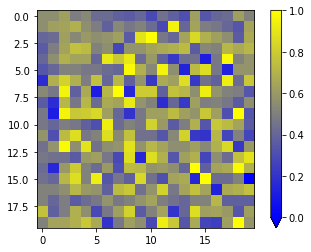

In [714]:
visualize_weights(weights)

## Predictions

In [713]:
def predict(input, weights):
    sum = activation(weights, input)
    if sum > BIAS:
        print("Predicted Circle")
    else:
        print("Predicted Rectangle")

In [715]:
circle = generate_circle(input)
predict(circle, weights)

Predicted Circle
